In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [186]:
df = pd.read_csv('base_data/hackathon_data_basketball_2023.csv')
nd = df[df.player_off_a == "Nading, Samuel"]
heights = pd.concat([df.player_off_a, df.player_defMatchup_ht])

In [190]:
nd_ftpercent = nd['ft_player'].sum()/nd['fta'].sum()
nd_percent = nd['fg'].sum()/nd['fga'].sum()
nd_3percent = nd['fg3'].sum()/nd['fga3'].sum()
nd_iso_ppa = nd['iso_pts'].sum()/nd['iso_actions'].sum()
nd_pick_ppa = nd['pick_pts'].sum()/nd['pick_actions'].sum()
nd_post_ppa = nd['post_pts'].sum()/nd['post_actions'].sum()
nd_offball_ppa = nd['offBall_pts'].sum()/nd['offBall_actions'].sum()
#nd_fouls_pos = nd[''].sum()/nd[''].sum()

nd_2ptpercentage = (nd['fg'].sum() - nd['fg3'].sum()) / (nd['fga'].sum() - nd['fga3'].sum())

print(nd_ftpercent, nd_percent, nd_3percent, nd_iso_ppa, nd_pick_ppa, nd_post_ppa, nd_offball_ppa, nd_2ptpercentage)

0.7089201877934272 0.48697394789579157 0.3050847457627119 0.9357142857142857 0.675206611570248 0.782258064516129 0.7771084337349398 0.5869565217391305


In [193]:
df = pd.read_csv('filtered_sets/player_averages.csv')
name = np.array(['Free_Throw%', 'Field_Goal%', '2pt%', '3pt%', 'Iso', 'Pick', 'Post', 'Offball', 'AT_Ratio', 'TT_ratio'])#, 'TP_Ratio', 'SQavg'])
top = np.array(['ft_player', 'fg', 'empty', 'fg3', 'iso_pts', 'pick_pts', 'post_pts', 'offBall_pts', 'tov', 'tov'])#, 'tov', 'qsq'])
bottom = np.array(['fta', 'fga', 'empty', 'fga3', 'iso_actions', 'pick_actions', 'post_actions', 'offBall_actions', 'assistOppCreated', 'touches'])#, 'poss', 'poss'])

In [194]:
def create_stats_column(df, i, top=top, bottom=bottom, multi_var=False):
    top = top[i]
    bottom = bottom[i]
    row = np.zeros(0, dtype=float)
    for j in range(np.shape(df)[0]):
        if(multi_var):
            #print('2pt%' if name[i] != '2pt%' else 'multi')
            num = df[f'avg_fg'].iloc[j] - df[f'avg_fg3'].iloc[j]
            denom = df[f'avg_fga'].iloc[j] - df[f'avg_fga3'].iloc[j]
            result = num/denom
        else:
            result = df[f'avg_{top}'].iloc[j]/df[f'avg_{bottom}'].iloc[j]
        row = np.append(row, [result])
    return row

def update_df(df, top=top, bottom=bottom):
    for i in range(len(name)-1):
        name_temp = name[i]
        #print(name_temp, name[i])
        data = pd.DataFrame({f'{name_temp}': create_stats_column(df, i, top, bottom, multi_var=(True if name[i] == '2pt%' else False))})
        df = pd.concat([df, data], axis=1)
    print(np.shape(df))
    return df

df = update_df(pd.read_csv('filtered_sets/player_averages.csv'))

(102, 39)


In [204]:
df[['player_defMatchup_a','player_defMatchup_ht','Field_Goal%','2pt%','3pt%']].sort_values(by=['3pt%']).head(25)

,Unnamed: 0,index,player_defMatchup_a,player_defMatchup_ht,avg_player_off_ht,avg_ptsScored_team,avg_fga,avg_fg,avg_fga3,avg_fg3,...,avg_fouls,Free_Throw%,Field_Goal%,2pt%,3pt%,Iso,Pick,Post,Offball,AT_Ratio
78,78,260365,"Valdez, Isaiah",74,76.451,0.995,0.956,0.384,0.403,0.118,...,1.000,0.798494,0.401674,0.481013,0.292804,0.847000,0.512195,0.625000,0.384615,4.784689
92,92,309356,"Tunnell, Clifton",82,81.906,1.065,0.926,0.493,0.287,0.087,...,1.000,0.670938,0.532397,0.635368,0.303136,0.728963,0.604044,1.000000,0.517857,5.586592
50,50,168617,"Kierstead, Iaasic",81,79.373,1.012,0.944,0.376,0.500,0.154,...,1.000,0.629736,0.398305,0.500000,0.308000,0.938000,0.572420,0.782775,0.420455,7.812500
85,85,285741,"Williams, Daniel",76,77.749,1.043,0.939,0.412,0.457,0.143,...,1.000,0.789587,0.438765,0.558091,0.312910,0.945491,0.566695,0.820000,0.400000,6.849315
84,84,282185,"Chacon, Parker",75,77.243,1.070,0.934,0.400,0.377,0.118,...,1.000,0.788281,0.428266,0.506284,0.312997,0.817279,0.601986,0.941000,0.404908,5.000000
17,17,58227,"Diaz, Joshua",77,77.272,1.022,0.938,0.428,0.380,0.121,...,1.000,0.835718,0.456290,0.550179,0.318421,0.930000,0.599659,0.973000,0.331606,5.000000
96,96,323537,"Schubert, Christian",76,77.343,1.002,0.948,0.400,0.334,0.107,...,1.000,0.757628,0.421941,0.477199,0.320359,0.834990,0.660944,0.929000,0.452514,4.854369
1,1,3792,"House, Brandyn",76,77.005,1.009,0.945,0.401,0.368,0.119,...,1.000,0.808870,0.424339,0.488735,0.323370,0.838614,0.650373,0.909000,0.446281,5.747126
35,35,119901,"Ortiz, Marcus",76,76.481,1.098,0.917,0.370,0.496,0.163,...,1.000,0.701783,0.403490,0.491686,0.328629,0.837117,0.660328,0.848691,0.441176,4.329004
16,16,55161,"Lial, Tyler",79,78.400,1.020,0.955,0.426,0.428,0.141,...,1.000,0.791715,0.446073,0.540797,0.329439,0.712092,0.594991,0.878000,0.449367,5.847953


In [209]:
df[['player_defMatchup_a','player_defMatchup_ht','Field_Goal%','2pt%','3pt%']].sort_values(by=['2pt%']).head(25)

,player_defMatchup_a,player_defMatchup_ht,Field_Goal%,2pt%,3pt%
64,"Zaman, Chase",81,0.394004,0.428571,0.348259
11,"Youngblood, Andrew",78,0.396308,0.433962,0.345269
33,"Wells, Dale",80,0.407881,0.435798,0.374118
63,"Rinhart, Austin",75,0.396186,0.442953,0.354125
36,"Martinez, Colen",77,0.419006,0.467290,0.352941
68,"Thin-Elk, Edward",74,0.417012,0.468085,0.357942
54,"Hamlin, Konray",77,0.408480,0.471831,0.358595
48,"Watson, Trae",74,0.451168,0.472119,0.423267
96,"Schubert, Christian",76,0.421941,0.477199,0.320359
32,"Hammond, Brandyn",78,0.416490,0.478261,0.352052


In [51]:
nading_stats = {'Free_Throw%': nd_ftpercent, 'Field_Goal%': nd_percent, '3pt%': nd_3percent, 'Iso': nd_iso_ppa, 'Pick': nd_pick_ppa, 'Post': nd_post_ppa, 'Offball': nd_offball_ppa}

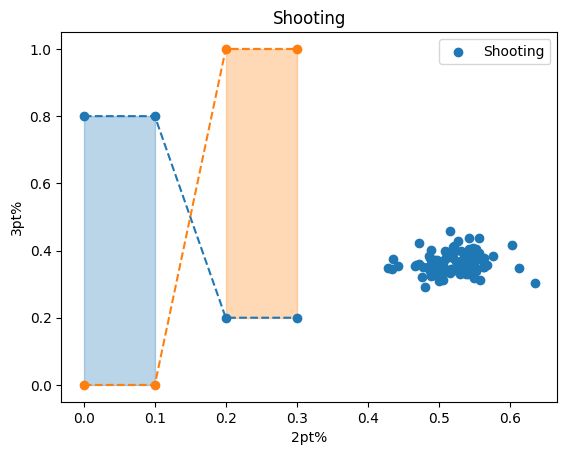

In [220]:
# Set the figure size in inches
#plt.figure(figsize=(10,6))

x_val = df[['2pt%']]
y_val = df[['3pt%']]

plt.scatter(x_val, y_val, label = "Shooting" )

x = np.array([0, .1, .2, .3])
y1 = np.array([0.8, 0.8, 0.2, 0.2])
y2 = np.array([0, 0, 1, 1])

ax1.set_title('interpolation=False')
plt.plot(x, y1, 'o--')
plt.plot(x, y2, 'o--')
plt.fill_between(x, y1, y2, where=(y1 > y2), color='C0', alpha=0.3)
plt.fill_between(x, y1, y2, where=(y1 < y2), color='C1', alpha=0.3)

# Set x and y axes labels
plt.xlabel('2pt%')
plt.ylabel('3pt%')

plt.title('Shooting')
plt.legend()
plt.show()